In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd

# Step 1: Load the JSON data into a DataFrame
meta_json_path = '/content/drive/MyDrive/Colab Notebooks/KCL project/extended-features/meta.json'  # Update this path
df_meta = pd.read_json(meta_json_path)

# Step 2: Drop the 'sha256' column
df_meta = df_meta.drop(columns=['sha256'])

## Linear SVC (All Features on)

In [ ]:
import json
import pickle
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def load_X(dataset_path, reduced=False):
    print("Loading data (feature representation X, and feature names)...")
    # Load the reduced 10k features
    if reduced:
        with open('{}/X-10k.p'.format(dataset_path), 'rb') as f:
            X = pickle.load(f)
        with open('{}/f-10k.p'.format(dataset_path), 'rb') as f:
            feature_names = pickle.load(f)
    else:
        with open('{}/X.json'.format(dataset_path), 'r') as f:
            X = json.load(f)

        # Convert to numpy array and get feature names
        vec = DictVectorizer()
        X = vec.fit_transform(X).astype("float32")
        feature_names = vec.get_feature_names_out()

    return X, feature_names


def load_y(dataset_path):
    print('Loading labels...')
    with open('{}y.json'.format(dataset_path), 'rt') as f:
        y = json.load(f)
    y = np.asarray(y)
    return y


def load_metadata(dataset_path):
    print('Loading metadata...')
    with open('{}meta.json'.format(dataset_path), 'rt') as f:
        metadata = json.load(f)
    return metadata


if __name__ == '__main__':

    dataset_path = '/content/drive/MyDrive/Colab Notebooks/KCL project/extended-features/'

    # Flag reduced=True loads only the top 10k features; reduced=False loads the entire dataset of featues
    X, feature_names = load_X(dataset_path, reduced=False)
    y = load_y(dataset_path)
    metadata = load_metadata(dataset_path)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Machine learning model: Linear SVM (liblinear implementation)
    model = LinearSVC(C=1, dual=True, max_iter=10000)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate the accuray, the precision, the recall and the F1 score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average = 'binary')
    recall = recall_score(y_test, y_pred, average = 'binary')
    f1 = f1_score(y_test, y_pred)

    # Print the F1 score
    print()
    print("F1 score:", f1)
    print()
    print("Accuracy:", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)

Loading data (feature representation X, and feature names)...
Loading labels...
Loading metadata...

F1 score: 0.8956158663883089

Accuracy: 0.9787833198318096
Precision:  0.9094237810753517
Recall:  0.8822209758833427


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


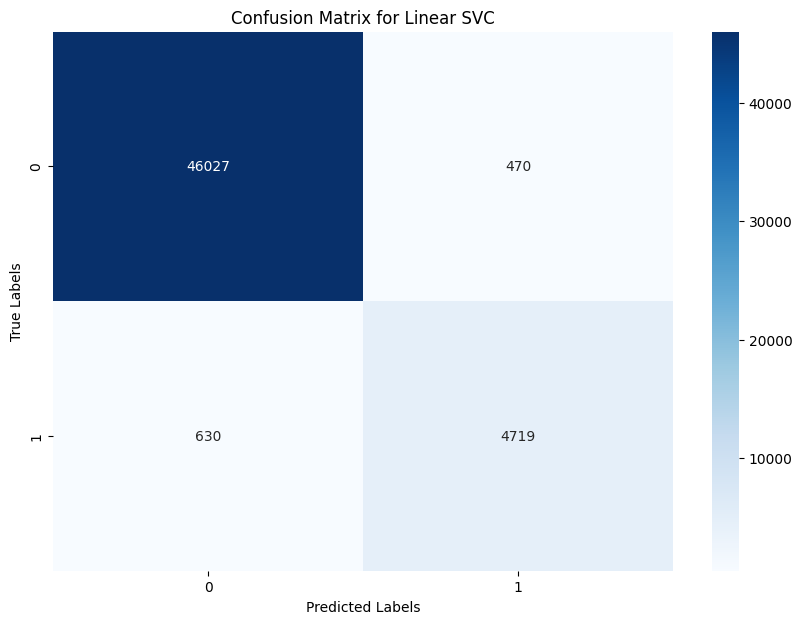

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm1 = confusion_matrix(y_test, y_pred)
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Linear SVC')
plt.show()

## Logistic Regression (All Features on)

In [ ]:
import json
import pickle
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def load_X(dataset_path, reduced=False):
    print("Loading data (feature representation X, and feature names)...")
    # Load the reduced 10k features
    if reduced:
        with open('{}/X-10k.p'.format(dataset_path), 'rb') as f:
            X = pickle.load(f)
        with open('{}/f-10k.p'.format(dataset_path), 'rb') as f:
            feature_names = pickle.load(f)
    else:
        with open('{}/X.json'.format(dataset_path), 'r') as f:
            X = json.load(f)

        # Convert to numpy array and get feature names
        vec = DictVectorizer()
        X = vec.fit_transform(X).astype("float32")
        feature_names = vec.get_feature_names_out()

    return X, feature_names


def load_y(dataset_path):
    print('Loading labels...')
    with open('{}y.json'.format(dataset_path), 'rt') as f:
        y = json.load(f)
    y = np.asarray(y)
    return y


def load_metadata(dataset_path):
    print('Loading metadata...')
    with open('{}meta.json'.format(dataset_path), 'rt') as f:
        metadata = json.load(f)
    return metadata


if __name__ == '__main__':

    dataset_path = '/content/drive/MyDrive/Colab Notebooks/KCL project/extended-features/'

    # Flag reduced=True loads only the top 10k features; reduced=False loads the entire dataset of featues
    X, feature_names = load_X(dataset_path, reduced=False)
    y = load_y(dataset_path)
    metadata = load_metadata(dataset_path)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Machine learning model: Linear SVM (liblinear implementation)
    model = LogisticRegression(max_iter=10000)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate the accuray, the precision, the recall and the F1 score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average = 'binary')
    recall = recall_score(y_test, y_pred, average = 'binary')
    f1 = f1_score(y_test, y_pred)

    # Print the F1 score
    print()
    print("F1 score:", f1)
    print()
    print("Accuracy:", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)

Loading data (feature representation X, and feature names)...
Loading labels...
Loading metadata...

F1 score: 0.8984090473452175

Accuracy: 0.9795548354742892
Precision:  0.9217305801376597
Recall:  0.8762385492615442


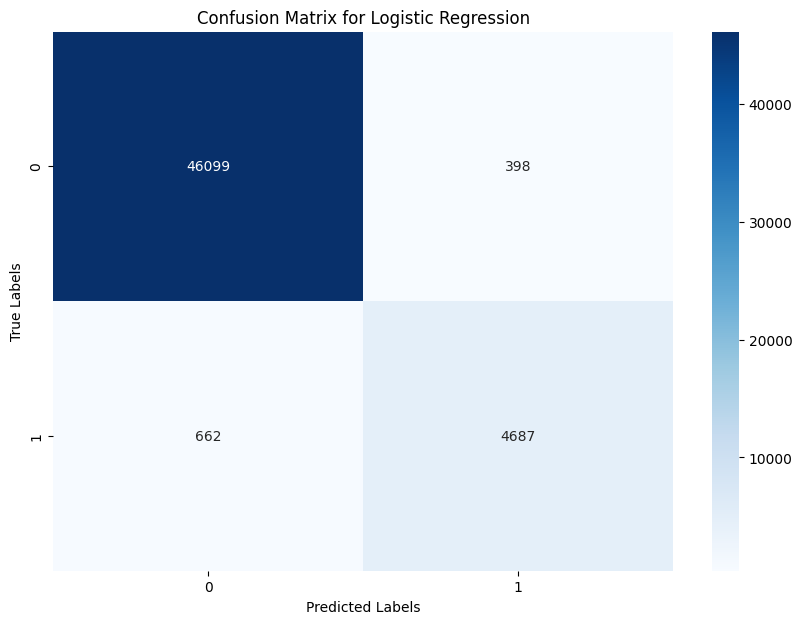

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm2 = confusion_matrix(y_test, y_pred)
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

## Naive Bayes (All Features on)

In [ ]:
import json
import pickle
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def load_X(dataset_path, reduced=False):
    print("Loading data (feature representation X, and feature names)...")
    # Load the reduced 10k features
    if reduced:
        with open('{}/X-10k.p'.format(dataset_path), 'rb') as f:
            X = pickle.load(f)
        with open('{}/f-10k.p'.format(dataset_path), 'rb') as f:
            feature_names = pickle.load(f)
    else:
        with open('{}/X.json'.format(dataset_path), 'r') as f:
            X = json.load(f)

        # Convert to numpy array and get feature names
        vec = DictVectorizer()
        X = vec.fit_transform(X).astype("float32")
        feature_names = vec.get_feature_names_out()

    return X, feature_names


def load_y(dataset_path):
    print('Loading labels...')
    with open('{}y.json'.format(dataset_path), 'rt') as f:
        y = json.load(f)
    y = np.asarray(y)
    return y


def load_metadata(dataset_path):
    print('Loading metadata...')
    with open('{}meta.json'.format(dataset_path), 'rt') as f:
        metadata = json.load(f)
    return metadata


if __name__ == '__main__':

    dataset_path = '/content/drive/MyDrive/Colab Notebooks/KCL project/extended-features/'

    # Flag reduced=True loads only the top 10k features; reduced=False loads the entire dataset of featues
    X, feature_names = load_X(dataset_path, reduced=False)
    y = load_y(dataset_path)
    metadata = load_metadata(dataset_path)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Machine learning model: Linear SVM (liblinear implementation)
    model = MultinomialNB()

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate F1 score
    f1 = f1_score(y_test, y_pred)

    # Calculate the accuray, the precision, the recall and the F1 score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average = 'binary')
    recall = recall_score(y_test, y_pred, average = 'binary')
    f1 = f1_score(y_test, y_pred)

    # Print the F1 score
    print()
    print("F1 score:", f1)
    print()
    print("Accuracy:", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)

Loading data (feature representation X, and feature names)...
Loading labels...
Loading metadata...

F1 score: 0.5626983407380542

Accuracy: 0.906974501408016
Precision:  0.5463028169014085
Recall:  0.5801084314825201


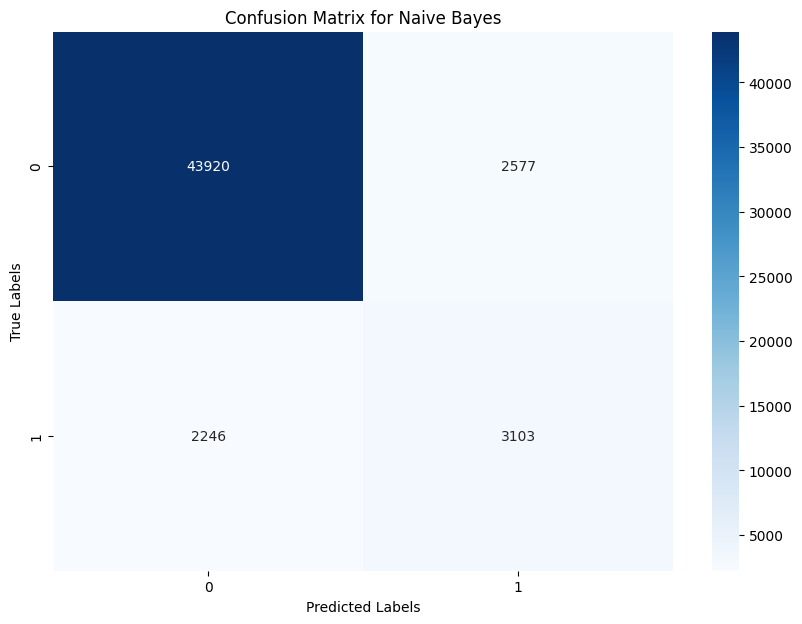

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm3 = confusion_matrix(y_test, y_pred)
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()

## Statistics of the Type of the Malware Features

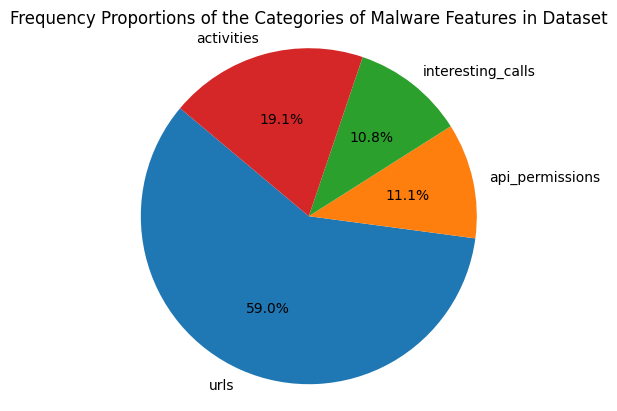

In [ ]:
import json
import matplotlib.pyplot as plt
with open('/content/drive/MyDrive/Colab Notebooks/KCL project/extended-features/X.json', 'r') as file:
  data = json.load(file)
words_to_count = ['urls', 'api_permissions', 'interesting_calls', 'activities']
word_counts = {'urls': 0, 'api_permissions': 0, 'interesting_calls': 0, 'activities': 0}
for record in data:
  for key in record.keys():
    for word in words_to_count:
      if word in key:
        word_counts[word] += 1

# Extract labels and sizes for the pie chart
labels = word_counts.keys()
sizes = word_counts.values()

# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle
plt.title('Frequency Proportions of the Categories of Malware Features in Dataset')
plt.show()

## Distribution of Malware / Benign Software

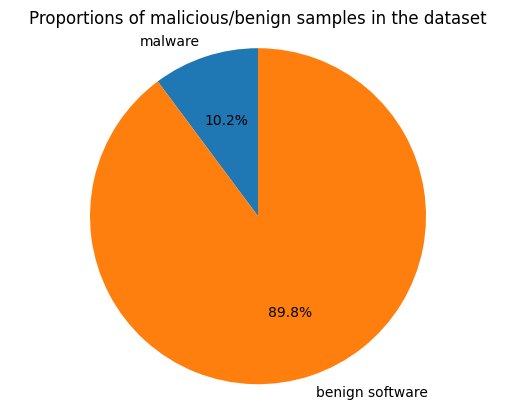

In [ ]:
import json
import matplotlib.pyplot as plt
# Load the JSON data from 'y.json'
with open('/content/drive/MyDrive/Colab Notebooks/KCL project/extended-features/y.json', 'r') as file:
    y_data = json.load(file)

# Assuming y_data is a list of 1's and 0's
num_ones = y_data.count(1)
num_zeros = y_data.count(0)

# Labels for the two sections
labels = ['malware', 'benign software']

# Sizes for each section
sizes = [num_ones, num_zeros]

# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Proportions of malicious/benign samples in the dataset')
plt.show()

## Linear SVC (URL only)

In [ ]:
import json
import pickle
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# def create_temporary_dataset_with_urls(dataset_path):
#     with open(f'{dataset_path}/X.json', 'r') as f_x:
#         data_x = json.load(f_x)
#     with open(f'{dataset_path}/y.json', 'r') as f_y:
#         data_y = json.load(f_y)

#     # Filter and create temporary datasets
#     temp_data_x = []
#     temp_data_y = []
#     for index, record in enumerate(data_x):
#         if 'urls' in record and record['urls']:
#             temp_data_x.append({'urls': record['urls']})
#             temp_data_y.append(data_y[index])

#     if not temp_data_x:
#         print("No 'urls' features found in the dataset. Skipping analysis.")
#         return None  # Indicate skipping

#     # Save the temporary datasets
#     temp_dataset_path_x = f'{dataset_path}/temp_X.json'
#     temp_dataset_path_y = f'{dataset_path}/temp_y.json'
#     with open(temp_dataset_path_x, 'w') as f:
#         json.dump(temp_data_x, f)
#     with open(temp_dataset_path_y, 'w') as f:
#         json.dump(temp_data_y, f)

#     return temp_dataset_path_x, temp_dataset_path_y
def create_temp_dataset(dataset_path):
    with open(f'{dataset_path}/X.json', 'r') as f_x:
        data_x = json.load(f_x)
    with open(f'{dataset_path}/y.json', 'r') as f_y:
        data_y = json.load(f_y)

    temp_data_x = [{'urls': record['urls']} for record in data_x if 'urls' in record]
    temp_data_y = [data_y[index] for index, record in enumerate(data_x) if 'urls' in record]

    if not temp_data_x:
        print("No 'urls' features found in the dataset.")
        return None  # Indicate that no temporary dataset was created

    # Optionally, save to temporary JSON files
    temp_x_path = f'{dataset_path}/temp_X.json'
    temp_y_path = f'{dataset_path}/temp_y.json'
    with open(temp_x_path, 'w') as f_temp_x:
        json.dump(temp_data_x, f_temp_x)
    with open(temp_y_path, 'w') as f_temp_y:
        json.dump(temp_data_y, f_temp_y)

    return temp_x_path, temp_y_path

def load_X(dataset_path, reduced=False):
    print("Loading data (feature representation X, and feature names)...")
    # Load the reduced 10k features
    if reduced:
        with open('{}/X-10k.p'.format(dataset_path), 'rb') as f:
            X = pickle.load(f)
        with open('{}/f-10k.p'.format(dataset_path), 'rb') as f:
            feature_names = pickle.load(f)
    else:
        with open('{}'.format(dataset_path), 'r') as f:
            X = json.load(f)
        # Convert to numpy array and get feature names
        vec = DictVectorizer()
        X = vec.fit_transform(X).astype("float32")
        feature_names = vec.get_feature_names_out()

    return X, feature_names

def load_y(dataset_path):
    print('Loading labels...')
    with open('{}'.format(dataset_path), 'rt') as f:
        y = json.load(f)
    y = np.asarray(y)
    return y


def load_metadata(dataset_path):
    print('Loading metadata...')
    with open('{}meta.json'.format(dataset_path), 'rt') as f:
        metadata = json.load(f)
    return metadata


if __name__ == '__main__':

    dataset_path = '/content/drive/MyDrive/Colab Notebooks/KCL project/extended-features/'
    temp_dataset = create_temp_dataset(dataset_path)

    if temp_dataset:
        temp_x_path, temp_y_path = temp_dataset
        # Load the temporary dataset and proceed with analysis
    else:
        print("Skipping analysis due to no 'urls' features.")
    # Load the temporary datasets and proceed with the analysis
    # This involves loading data from 'temp_dataset_path_x' and 'temp_dataset_path_y'
    # And then proceeding with the usual machine learning workflow, such as vectorization, training, and evaluation
    # Flag reduced=True loads only the top 10k features; reduced=False loads the entire dataset of featues
    X, feature_names = load_X(temp_x_path, reduced=False)
    y = load_y(temp_y_path)
    metadata = load_metadata(dataset_path)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Machine learning model: Linear SVM (liblinear implementation)
    model = LinearSVC(C=1, dual=True, max_iter=10000)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate F1 score
    f1 = f1_score(y_test, y_pred)

    # Calculate the accuray, the precision, the recall and the F1 score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average = 'binary')
    recall = recall_score(y_test, y_pred, average = 'binary')
    f1 = f1_score(y_test, y_pred)

    # Print the F1 score
    print()
    print("F1 score:", f1)
    print()
    print("Accuracy:", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)

No 'urls' features found in the dataset.
Skipping analysis due to no 'urls' features.


NameError: name 'temp_x_path' is not defined